In [1]:
# Import necessary packages
import pandas as pd 
import os
import sys
sys.path.append('/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/Notebook Functions')
sys.path.append('/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/Global Functions')
from helper_functions import date_to_decimal_year, rain_predictor, rain_combine, data_cleaner, data_expand
from plot_functions import eruption_counter, annual_plotter, bar_plotter, rain_averager
from el_nino_functions import elnino_strengths, nino_dict

In [2]:
# Create path to data
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/GALAPAGOS_DATA'

In [3]:
# Import tables
volcanic_events = pd.read_csv(os.path.join(folder_path, "erupt_2024.csv"))
rainfall = pd.read_csv(os.path.join(folder_path, "update_2024.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))

oni = pd.read_csv(os.path.join(folder_path, "oni.csv"))

Eruption data must have columns: 'Volcano' and 'Start'. 'Start' is the beginning date of the eruption given as a string-- YYYY-MM-DD.

Rainfall data must have columns: 'Date', 'Longitude', 'Latitude', and 'Precipitation'. 'Date' is given as a string YYYY-MM-DD and the other three columns are floats.

In [4]:
sites_dict = {'Ayora': (-90.35,-.75, 'Puerto Ayora'), 'Bellavista': (-90.35, -.65, 'Bellavista')}
quantiles = 3 # Number of bins to break up rainfall into
rolling_number = 90 # Number of days to average rainfall over
log_flag = True # If true, applies a log scaling to the data
by_season = False # Make true if you want to consider rainfall quantiles yearly, or False to consider rainfall quantiles across the entire date range

# Uncomment below to use rain predictor gauge location. (For analyses of eruptions between 1964 and 2000)
# start = rainfall['Date'].min()
# compare_site = ayora
# rain_gauge = data_cleaner(compare_site)
# rainfall = data_expand(rain_gauge[rain_gauge['Date'] < start], [[sites_dict[i][0], sites_dict[i][1]] for i in sites_dict])

elninos = nino_dict(oni, rainfall)

We look at rolling averages of rainfall at each volcano site. We group dates at each volcano into quantiles based on the rolling rain averages. In gray, we've included the cumulative precipitation.

There is no volcano associated with these coordinates.
There is no volcano associated with these coordinates.


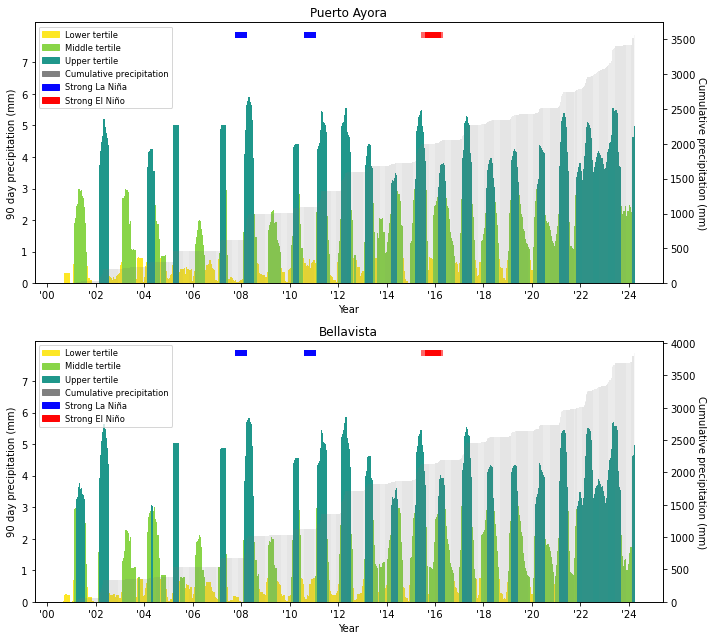

In [6]:
bar_plotter(sites_dict, rainfall, quantiles, rolling_number, volcanic_events, by_season, log_flag, elninos)

Below, we plot rainfall at the volcano sites by year.

There is no volcano associated with these coordinates.
There is no volcano associated with these coordinates.


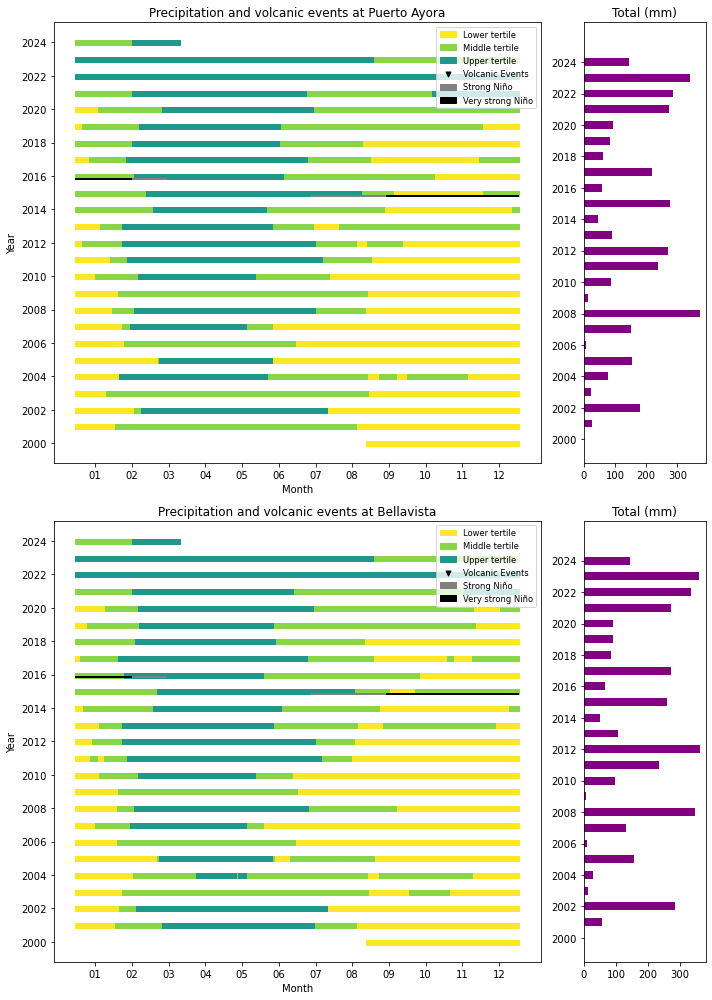

In [8]:
annual_plotter(sites_dict, rainfall, quantiles, rolling_number, volcanic_events, by_season, log_flag, elninos)